Welcome to Makeup and Skincare Finder!
Would you like to search makeup or skincare products? makeup
Enter a makeup brand: boosh
Enter a product type: lipstick
Enter the type of category: lipstick
Here is your product result: 
 boosh Lipstick 
 Description: All of our products are free from lead and heavy metals, parabens, phthalates, artificial colourants, and synthetic fragrances.  Boosh lipstick glides on smoothly for clean & protective SPF coverage. They are filled with hydrating oils and butters to preserve and enhance your lips natural surface. Organic sweet orange oil gives a light and cheerful scent. 
 Safety Information: ['Organic', 'Chemical Free'] 
 Link to buy: https://www.boosh.ca/collections/all


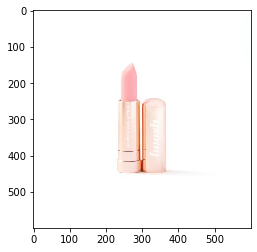

In [9]:
!pip install -q requests
!pip install pillow
from PIL import Image
import matplotlib.pyplot as plt
import json
import pandas as pd
import requests

try:
    makeup_url = 'https://makeup-api.herokuapp.com/api/v1/products.json'
    skincare_url = 'https://skincare-api.herokuapp.com/products.json'
    makeup_products = pd.read_json(makeup_url)
    skincare_products = pd.read_json(skincare_url)
    print("Welcome to Makeup and Skincare Finder!")
    makeup_or_skincare = input("Would you like to search makeup or skincare products? ")
    if makeup_or_skincare == 'makeup':
        try:
            input_brand = input("Enter a makeup brand: ") 
            input_product_type = input("Enter a product type: ")  
            input_category = input("Enter the type of category: ") 
            params = {'brand' : input_brand, 'product_type' : input_product_type, 'category': input_category}
            makeup_response = requests.get('https://makeup-api.herokuapp.com/api/v1/products.json', params=params)
            your_product = makeup_response.json()
            brand = your_product[0]['brand']
            name = your_product[0]['name']
            description = your_product[0]['description']
            product_link = your_product[0]['product_link']
            tags = your_product[0]['tag_list']
            image_link = your_product[0]['image_link']
            print( "Here is your product result: \n",brand, name,'\n Description:', description,'\n Safety Information:', tags,'\n Link to buy:',product_link)
            response = requests.get(image_link, stream=True)
            img = Image.open(response.raw)
            plt.imshow(img)
            plt.show() 
        except:
            print("Unfortunately the parameters you entered do not match a makeup product we have available.")
    elif makeup_or_skincare == 'skincare':
        input_skin_brand = input("Enter skincare brand: ")
        input_skin_name = input("Enter skincare product name: ") 
        skincare_response = requests.get('https://skincare-api.herokuapp.com/products.json')
        skincare = skincare_response.json()
        for product in skincare:
            if product['brand'] == input_skin_brand and product['name'] == input_skin_name:
                print("Here are your results:\n",product['brand'],product['name'],"contains the following ingredients:",product['ingredient_list'])
        if product['brand'] != input_skin_brand or product['name'] != input_skin_name:
            print("Unfortunately the parameters you entered do not match a skincare product we have available.")
                
    else:
        print("Error in input. Check spelling of 'makeup' or 'skincare'")
except requests.exceptions.RequestException as e:
    print("ERROR: Cannot connect to ", makeup_url)
    print("DETAILS:", e)
except requests.exceptions.HTTPError as e:
    print("ERROR: Response from ", makeup_url, 'was not ok.')
    print("DETAILS:", e)
except requests.exceptions.RequestException as e:
    print("ERROR: Cannot connect to ", skincare_url)
    print("DETAILS:", e)
except requests.exceptions.HTTPError as e:
    print("ERROR: Response from ", skincare_url, 'was not ok.')
    print("DETAILS:", e)